<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Analitika_bolshih_dannyh/Kejsy_i_oblasti_bolshih_dannyh/DZ_Kondratev_Kejsy_i_oblasti_bolshih_dannyh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Самостоятельное домашнее задание к занятию «Кейсы и области применения больших данных»

**Преподаватель:** Алексей Кузьмин

**Цель задания**

Научиться решать практические задачи с использованием pandas или pyspark на основе реальных данных и провести работу с данными от загрузки данных до построения модели.

**Важно**

Это задание не будет проверено экспертом, однако, стоит его выполнить, чтобы отработать теорию и с лёгкостью справляться с подобными задачами на практике.

**Контекст**

Дан набор данных по оттоку клиентов. Набор данных содержит всего 5 000 записей (то есть абонентов).

Данные доступны [тут](https://drive.google.com/open?id=1ArslqEEno2hrr5tAs25P0JN0P-coLcFD)

Перечень полей:

* state – штат
* account length – абонентский стаж
* area code – код региона
* phone number – номер телефона
* international plan – тарифный план для международных звонков
* voice mail plan – тарифный план для голосовой почты
* number vmail messages – количество сообщений голосовой почты
* total day minutes – общая длительность звонков в дневное время (мин)
* total day calls – общее количество звонков в дневное время
* total day charge – общая стоимость звонков в дневное время
* total eve minutes – общая длительность звонков в вечернее время (мин)
* total eve calls – общее количество звонков в вечернее время
* total eve charge – общая стоимость звонков в вечернее время
* total night minutes – общая длительность звонков в ночное время (мин)
* total night calls – общее количество звонков в ночное время
* total night charge – общая стоимость звонков в ночное время
* total intl minutes – общая длительность международных звонков (мин)
* total intl calls – общее количество международных звонков
* total intl charge – общая стоимость международных звонков
* number customer service calls – количество звонков в службу поддержки
* churned – покинул ли клиент компанию

**Описание задания**

Ваша задача - используя `panda`s или `pyspark`, ответить на следующие вопросы:



1. Построить гистограмму количества звонков в техническую поддержку
2. Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международных)
3. Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (доп. материалы общего количества минут и количества звонков в техподдержку
4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента
5. Вывести top-5 самых много и самых мало говорящих клиентов
6. Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата
7. Перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалить колонку, если вы делаете решение на pyspark
8. Разбить данные на множества для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные атрибуты)
9. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

**Формат выполнения**

Выполните задание в Google Colaboratory (Python) с помощью pandas или pyspark.

**Результат выполненного задания**

* Для корректной сдачи домашнего задания необходимо в личном кабинете прикреплять ссылку на ваше решение в Google Colab.
* После того, как вы прикрепите ссылку на своё решение в личном кабинете, вам станет доступно эталонное решение, которое подготовил эксперт. Проверьте правильность выполнения этого задания самостоятельно, сравнив свой документ с эталоном.
* Если в процессе выполнения самостоятельного домашнего задания у вас возникнут вопросы, их можно будет обсудить с экспертом на разборном вебинаре.

### Загрузка данных

In [387]:
# Загрузка данных

import pandas as pd

# Загрузите данные
data = pd.read_csv('https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Analitika_bolshih_dannyh/Kejsy_i_oblasti_bolshih_dannyh/churn.csv')

In [388]:
# Отображаем датафрейм.
data

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False


In [389]:
# Обзор данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   international_plan             5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [390]:
# Статистики
data.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Построить гистограмму количества звонков в техническую поддержку

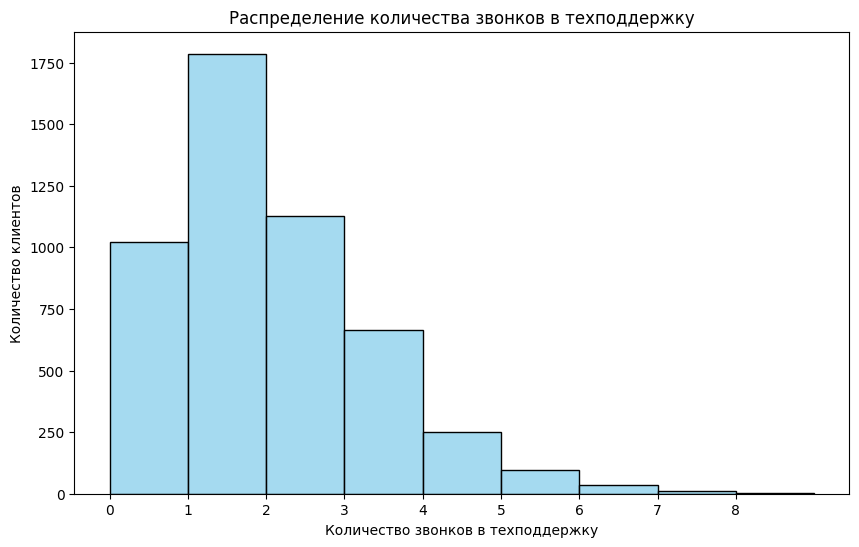

Статистика по количеству звонков в техподдержку:
count    5000.000000
mean        1.570400
std         1.306363
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: number_customer_service_calls, dtype: float64


In [391]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение гистограммы распределения количества звонков
plt.figure(figsize=(10, 6))
sns.histplot(data['number_customer_service_calls'], bins=9, color='skyblue', edgecolor='black')
plt.xticks(range(0, 9, 1))  # устанавливаем метки оси x с шагом 1 от 0 до 9
plt.xlabel("Количество звонков в техподдержку")
plt.ylabel("Количество клиентов")
plt.title("Распределение количества звонков в техподдержку")
plt.show()

# Вывод статистики по столбцу "Количество звонков в техподдержку"
print("Статистика по количеству звонков в техподдержку:")
print(data['number_customer_service_calls'].describe())

Исходя из этой статистики, можно сделать предположение, что большинство клиентов совершают 1-2 звонка в техподдержку, и лишь небольшое количество клиентов совершает более 2 звонков. Распределение имеет склонность к нормальному виду, с большим количеством клиентов, которые делают минимальное количество звонко

### Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международных)

In [392]:
# Рассчет общей длительности звонков
data['total_duration'] = data['total_day_minutes'] + data['total_eve_minutes'] + data['total_night_minutes'] + data['total_intl_minutes']

In [393]:
data.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,total_duration
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,717.2
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,625.2
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,539.4
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,564.8
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,512.0


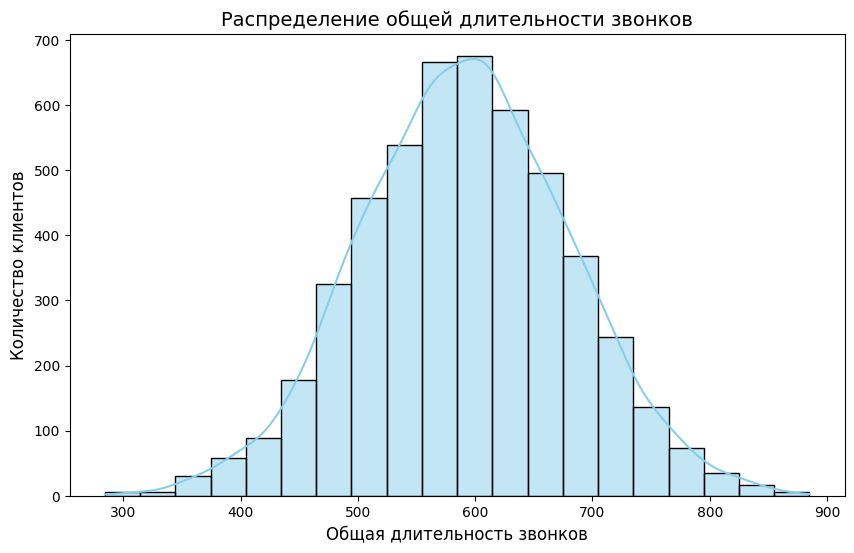

Статистика по общей длительности звонков:
count    5000.000000
mean      591.578860
std        89.071881
min       284.300000
25%       531.200000
50%       592.400000
75%       652.025000
max       885.000000
Name: total_duration, dtype: float64


In [394]:
# Построение гистограммы распределения общей длительности звонков
plt.figure(figsize=(10, 6))
sns.histplot(data['total_duration'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.xlabel("Общая длительность звонков", fontsize=12)
plt.ylabel("Количество клиентов", fontsize=12)
plt.title("Распределение общей длительности звонков", fontsize=14)
plt.show()

# Вывод статистики по столбцу "Общая длительность звонков"
print("Статистика по общей длительности звонков:")
print(data['total_duration'].describe())

Из гистограммы распределения общей длительности звонков можно сделать вывод, что большинство клиентов имеют общую длительность звонков в диапазоне от примерно 500 до 650 минут. Среднее значение общей длительности звонков составляет приблизительно 591.58 минут, с минимальным значением в 284.3 минуты и максимальным значением в 885 минут. Стандартное отклонение равно приблизительно 89.07 минут.

Это говорит о том, что клиенты в среднем разговаривают по телефону около 591 минут в месяц, со значительными вариациями в общей длительности звонков. Некоторые клиенты разговаривают значительно больше или меньше, чем среднее значение.

### Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции ([доп. материалы](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F) общего количества минут и количества звонков в техподдержку

In [395]:
def correlation(x, y):
    mean_x = x.mean()
    mean_y = y.mean()
    std_x = x.std()
    std_y = y.std()

    return ((x - mean_x) * (y - mean_y)).sum() / (len(x) * std_x * std_y)

corr = correlation(data['total_duration'], data['number_customer_service_calls'])
print("Коэффициент корреляции:", corr)

Коэффициент корреляции: -0.011405629245275925


Коэффициент корреляции, (-0.011405629245275925), указывает на очень слабую отрицательную корреляцию между общим количеством минут и количеством звонков в поддержку. Это означает, что в данном наборе данных существует очень слабая связь между этими двумя переменными. То есть, увеличение общего количества минут не приводит к увеличению количества звонков в поддержку, и наоборот. Однако, из-за слабой корреляции, нельзя сделать однозначные выводы о причинно-следственной связи между этими переменными.

### Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента

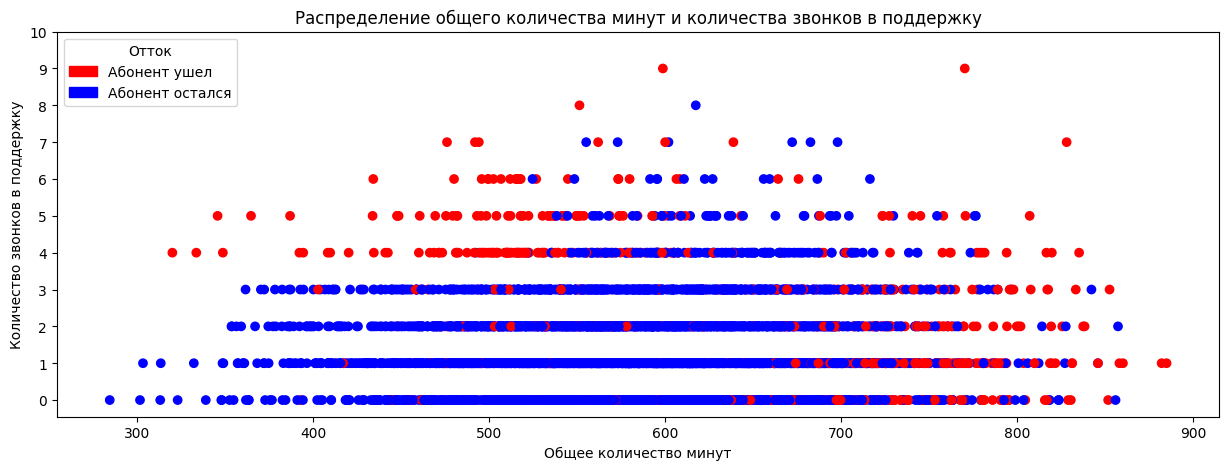

In [396]:
import matplotlib.patches as mpatches

# Визуализация точечного графика
plt.figure(figsize=(15, 5))
colors = data['churned'].map({True: 'red', False: 'blue'})
scatter = plt.scatter(data['total_duration'], data['number_customer_service_calls'], c=colors)

red_patch = mpatches.Patch(color='red', label='Абонент ушел')
blue_patch = mpatches.Patch(color='blue', label='Абонент остался')

plt.legend(handles=[red_patch, blue_patch], title='Отток', loc='upper left')
plt.yticks(range(0, 11, 1))
plt.xlabel('Общее количество минут')
plt.ylabel('Количество звонков в поддержку')
plt.title('Распределение общего количества минут и количества звонков в поддержку')

plt.show()

### Смотрим на статистическую значимость оттока абонентов в зависимости от общго количества минут / количеству звонков в поддержку / стажа абонента

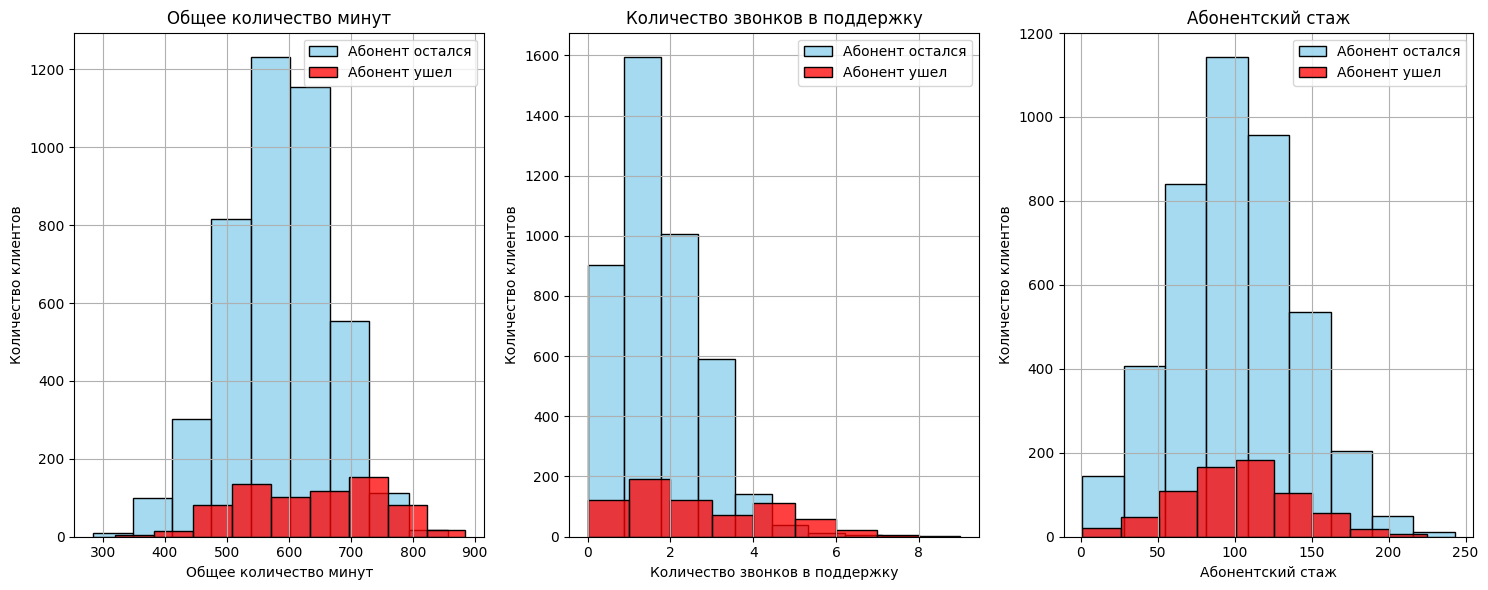


Статистика для абонентов, которые остались:
        по минутам  по звонкам в поддержку         стаж
count  4293.000000             4293.000000  4293.000000
mean    584.197577                1.457722    99.917074
std      82.674286                1.164236    39.737531
min     284.300000                0.000000     1.000000
25%     529.500000                1.000000    73.000000
50%     587.500000                1.000000    99.000000
75%     640.600000                2.000000   127.000000
max     857.400000                8.000000   243.000000

Статистика для абонентов, которые ушли:
       по минутам  по звонкам в поддержку        стаж
count  707.000000              707.000000  707.000000
mean   636.399010                2.254597  102.332390
std    110.823173                1.815956   39.396993
min    319.900000                0.000000    1.000000
25%    542.050000                1.000000   76.000000
50%    649.500000                2.000000  102.000000
75%    725.800000               

In [397]:
# строим графики распределения общего количества минут / количеству звонков в поддержку / стажа абонента
#  для ушедших абонентов и тех кто остался

import seaborn as sns
import matplotlib.pyplot as plt

# Создаем три графика в одном окне
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Первый график распределения общего количества минут для ушедших абонентов и тех кто остался
sns.histplot(data[data['churned'] == False]['total_duration'], bins=9, color='skyblue', edgecolor='black', label='Абонент остался', ax=axes[0])
sns.histplot(data[data['churned'] == True]['total_duration'], bins=9, color='red', edgecolor='black', label='Абонент ушел', ax=axes[0])
axes[0].set_xlabel("Общее количество минут")
axes[0].set_ylabel("Количество клиентов")
axes[0].set_title("Общее количество минут")
axes[0].legend()
axes[0].grid(True)

# Второй график распределения по количеству звонков в поддержку для ушедших абонентов и тех кто остался
sns.histplot(data[data['churned'] == False]['number_customer_service_calls'], bins=9, color='skyblue', edgecolor='black', label='Абонент остался', ax=axes[1])
sns.histplot(data[data['churned'] == True]['number_customer_service_calls'], bins=9, color='red', edgecolor='black', label='Абонент ушел', ax=axes[1])
axes[1].set_xlabel("Количество звонков в поддержку")
axes[1].set_ylabel("Количество клиентов")
axes[1].set_title("Количество звонков в поддержку")
axes[1].legend()
axes[1].grid(True)

# Третий график распределения стажа абонента для ушедших абонентов и тех кто остался
sns.histplot(data[data['churned'] == False]['account_length'], bins=9, color='skyblue', edgecolor='black', label='Абонент остался', ax=axes[2])
sns.histplot(data[data['churned'] == True]['account_length'], bins=9, color='red', edgecolor='black', label='Абонент ушел', ax=axes[2])
axes[2].set_xlabel("Абонентский стаж")
axes[2].set_ylabel("Количество клиентов")
axes[2].set_title("Абонентский стаж")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()  # Добавляем эту строку, чтобы автоматически изменить размер заголовков и легенд
plt.show()

# Создаем датафрейм для абонентов, которые остались
stayed_df = pd.DataFrame()
stayed_df['по минутам'] = data[data['churned'] == False]['total_duration']
stayed_df['по звонкам в поддержку'] = data[data['churned'] == False]['number_customer_service_calls']
stayed_df['стаж'] = data[data['churned'] == False]['account_length']

# Создаем датафрейм для абонентов, которые ушли
churned_df = pd.DataFrame()
churned_df['по минутам'] = data[data['churned'] == True]['total_duration']
churned_df['по звонкам в поддержку'] = data[data['churned'] == True]['number_customer_service_calls']
churned_df['стаж'] = data[data['churned'] == True]['account_length']

# Статистики для ушедших абонентов и тех кто остался
print()
print("Статистика для абонентов, которые остались:")
print(stayed_df.describe())
print("\nСтатистика для абонентов, которые ушли:")
print(churned_df.describe())

Из предоставленных статистик для абонентов, которые остались, и для тех, кто ушел, можно сделать некоторые аналитические выводы:

1. По общему количеству минут:
   - Для абонентов, которые остались, среднее значение по минутам составляет 584.20 минуты, в то время как для ушедших абонентов среднее значение выше и равно 636.40 минуты. Это может указывать на то, что абоненты, которые ушли, чаще пользовались услугами связи.
   - При этом разброс данных для ушедших абонентов, измеренный по стандартному отклонению, также выше, что указывает на большую изменчивость в использовании услуг.

2. По количеству звонков в поддержку:
   - Среднее количество звонков в поддержку для абонентов, которые остались (1.46), ниже, чем для ушедших абонентов (2.25). Это может свидетельствовать о том, что ушедшие абоненты сталкивались с проблемами, требующими более частого обращения в службу поддержки.
   - Также стандартное отклонение для количества звонков в поддержку существенно выше у ушедших абонентов, что указывает на большую переменчивость по этому параметру.

3. По абонентскому стажу:
   - Средний абонентский стаж для тех, кто остался, и тех, кто ушел, практически не отличается.
   - Таким образом, нет оснований утверждать, что стаж существенно влияет на факт ухода клиента.

### Смотрим на корреляцию между стажем и Количество звонков в поддержку \ Общим количеством минут

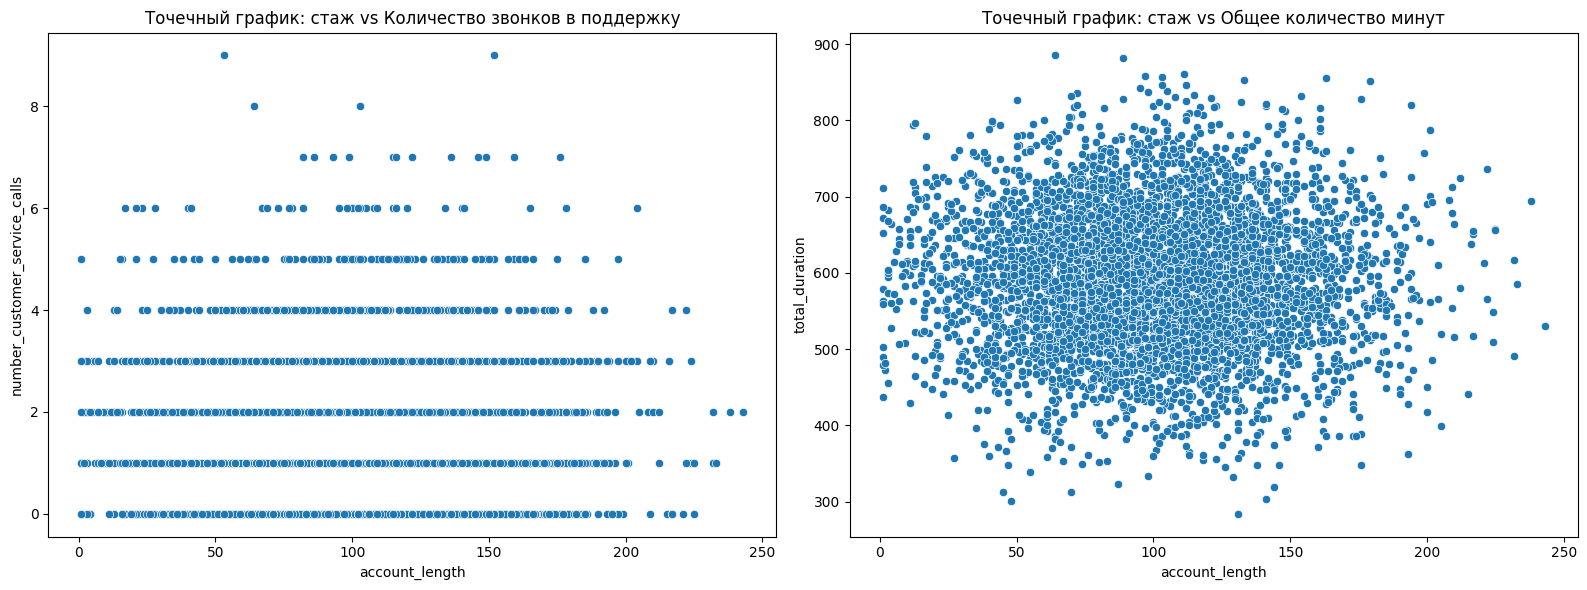


Коэффициент корреляции между стажем и Количество звонков в поддержку: -0.0014447917651621755
Коэффициент корреляции между стажем и Общим количеством минут: -0.005640154984024634


In [398]:
# Строим два графика корреляции между стажем - Количеством звонков в поддержку \ Общим количеством минут

plt.figure(figsize=(16, 6))

# Точечный график для стажа и Количество звонков в поддержку
plt.subplot(1, 2, 1)
sns.scatterplot(x='account_length', y='number_customer_service_calls', data=data)
plt.title('Точечный график: стаж vs Количество звонков в поддержку')
corr1 = data['account_length'].corr(data['number_customer_service_calls'])


# Точечный график для стажа и Общего количества минут
plt.subplot(1, 2, 2)
sns.scatterplot(x='account_length', y='total_duration', data=data)
plt.title('Точечный график: стаж vs Общее количество минут')
corr2 = data['account_length'].corr(data['total_duration'])


plt.tight_layout()
plt.show()

print()
print(f"Коэффициент корреляции между стажем и Количество звонков в поддержку: {corr1}")
print(f"Коэффициент корреляции между стажем и Общим количеством минут: {corr2}")

Исходя из предоставленных коэффициентов корреляции между стажем и количеством звонков в поддержку (-0.0014) и между стажем и общим количеством минут (-0.0056), мы видим, что значения коэффициентов корреляции близки к нулю.

Такие низкие значения коэффициентов корреляции указывают на отсутствие явной линейной зависимости между стажем и количеством звонков в поддержку, а также между стажем и общим количеством минут. Это свидетельствует о том, что изменения в стаже не сильно влияют на количество звонков в поддержку или общее количество минут, потраченных на звонки.

### Вывести top-5 самых много и самых мало говорящих клиентов

In [399]:
# Самые много говорящие клиенты (top-5)
top_5_most_talkative = data.sort_values(by='total_duration', ascending=False).head(5)
print("Top-5 самых много говорящих клиентов:")
print(top_5_most_talkative[['total_duration', 'state', 'phone_number']])

# Самые мало говорящие клиенты (top-5)
top_5_least_talkative = data.sort_values(by='total_duration').head(5)
print("\nTop-5 самых мало говорящих клиентов:")
print(top_5_least_talkative[['total_duration', 'state', 'phone_number']])
# по умолчанию данные сортируются по возрастанию (ascending=True),
# что делает этот код эквивалентным `data.sort_values(by='total_duration', ascending=True).head(5)`.
# Таким образом, мы получаем top-5 самых мало говорящих клиентов.

Top-5 самых много говорящих клиентов:
      total_duration state phone_number
985            885.0    NY     345-9140
289            882.2    OK     352-6976
3205           860.2    MS     345-3787
4991           858.2    AZ     410-3888
4271           857.4    MO     370-4667

Top-5 самых мало говорящих клиентов:
      total_duration state phone_number
648            284.3    WI     331-3174
1233           301.5    IL     380-5246
3779           303.2    MN     362-8044
1986           313.0    WI     405-9233
992            313.3    MI     375-8934


### Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата

In [400]:
# Группировка данных по штату
state_stats = data.groupby('state').agg({'churned': 'mean', 'total_day_charge': 'mean'})

# - `'churned': 'mean'`: В этом случае, для столбца 'churned', который содержит бинарные (True/False) значения,
# используется функция 'mean', которая вычисляет среднее значение. Поскольку значения 'churned' являются булевыми (True/False),
# среднее значение фактически представляет собой долю значений True (то есть долю клиентов, которые ушли).

# Переименование столбцов
state_stats = state_stats.rename(columns={'churned': 'Доля_оттока', 'total_day_charge': 'Средняя_стоимость_минуты'})

# Вывод результатов
state_stats.head()

,Доля_оттока,Средняя_стоимость_минуты
state,,
AK,0.069444,30.763333
AL,0.104839,32.210887
AR,0.173913,29.782065
AZ,0.101124,29.998315
CA,0.269231,29.399038


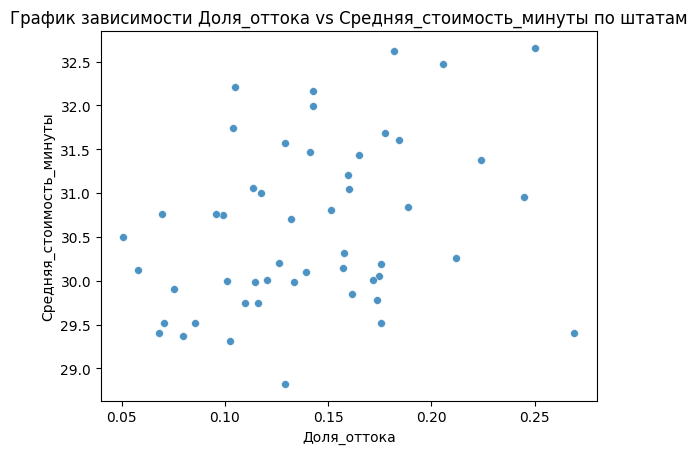

Коэффициент корреляции между Доля_оттока и Средняя_стоимость_минуты: 0.31965034824833943


In [401]:
# title График зависимости Доля_оттока vs Средняя_стоимость_минуты

import seaborn as sns
from matplotlib import pyplot as plt

# Создание графика с помощью sns.scatterplot
sns.scatterplot(data=state_stats, x='Доля_оттока', y='Средняя_стоимость_минуты', s=32, alpha=0.8)

plt.title('График зависимости Доля_оттока vs Средняя_стоимость_минуты по штатам')
plt.show()

# Вычисление коэффициента корреляции
correlation_coeff = state_stats['Доля_оттока'].corr(state_stats['Средняя_стоимость_минуты'])

# Вывод коэффициента корреляции
print('Коэффициент корреляции между Доля_оттока и Средняя_стоимость_минуты:', correlation_coeff)



Коэффициент корреляции между долей оттока и средней стоимостью минуты составляет около 0.32. Это означает, что существует слабая положительная корреляция между двумя переменными. То есть, увеличение средней стоимости минуты дневного времени разговора связано с небольшим увеличением доли оттока клиентов. Однако коэффициент корреляции не очень большой, поэтому связь между этими переменными можно охарактеризовать как слабую.

### Перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалить колонку, если вы делаете решение на pyspark

In [402]:
# Преобразование колонки 'state' в one-hot формат
df_one_hot = pd.get_dummies(data, columns=['state'], prefix='state')

df_one_hot

,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,408,365-8751,no,yes,40,235.7,127,40.07,223.0,...,0,0,0,0,0,0,0,0,0,0
4996,152,415,334-9736,no,no,0,184.2,90,31.31,256.8,...,0,0,0,0,0,0,0,0,1,0
4997,61,415,333-6861,no,no,0,140.6,89,23.90,172.8,...,0,0,0,0,0,0,0,0,0,0
4998,109,510,394-2206,no,no,0,188.8,67,32.10,171.7,...,0,0,0,0,0,0,0,0,0,0


### Разбить данные на множества для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные атрибуты)

In [403]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Отбор признаков для обучения модели
features = ['total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
            'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge',
            'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

X = data[features]
y = data['churned']

# Разделение данных на обучающее и тестовое множества
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке





По результатам статистики мы видим, что общая длительность звонков у клиентов имеет средний уровень в районе 591 минуты, с относительно небольшим разбросом вокруг среднего значения. Большинство клиентов тратят от 531 до 652 минут на звонки.


In [404]:
# Обучение модели логистической регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Предсказание на тестовом множестве
y_pred = model.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

Точность модели: 0.861


In [405]:
# Вывод фактических значений и предсказаний
from sklearn.metrics import confusion_matrix

# Создание матрицы ошибок (confusion matrix)
cm = confusion_matrix(y_test, y_pred)
true_negatives, false_positives, false_negatives, true_positives = cm.ravel()

print(f'Матрица ошибок:')
print(cm)
print(f'Удачных предсказаний (True Negatives): {true_negatives}')
print(f'Неудачных предсказаний (False Positives): {false_positives}')
print(f'Неудачных пропусков (False Negatives): {false_negatives}')
print(f'Удачных прогнозов (True Positives): {true_positives}')


Матрица ошибок:
[[849  12]
 [127  12]]
Удачных предсказаний (True Negatives): 849
Неудачных предсказаний (False Positives): 12
Неудачных пропусков (False Negatives): 127
Удачных прогнозов (True Positives): 12


Точность модели: Точность модели составляет 0.861, что означает, что модель находит правильный класс примерно в 86% случаев. При этом, хотелось бы проверить, насколько точна данная оценка на других наборах данных или путем кросс-валидации.



Исходя из матрицы ошибок, можно отметить, что модель показывает хорошее количество `True Negatives` (849), что свидетельствует о хорошем распознавании недействительных результатов. Однако, количество `False Negatives` (127) сравнительно высоко, что может означать, что модель часто пропускает действительные результаты

### решение на pyspark

Установка Spark

In [ ]:
# Обновляем пакеты системы с помощью apt-get update
!apt-get update

In [407]:
# Устанавливаем OpenJDK 8 с помощью apt-get install.
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [368]:
# Скачиваем архив Spark с официального сайта с помощью wget.
!wget -q https://downloads.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz

In [ ]:
# Распаковываем архив Spark с помощью tar -xvf.
!tar -xvf spark-3.5.0-bin-hadoop3.tgz

In [370]:
# Устанавливаем findspark с помощью pip install.
!pip install -q findspark

In [371]:
# Устанавливаем переменные окружения JAVA_HOME и SPARK_HOME для работы с Spark.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

In [372]:
# Инициализируем findspark для работы с Spark.
import findspark
findspark.init()

In [373]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import expr, col
from pyspark.sql.types import IntegerType

# Создание Spark сессии
spark = SparkSession.builder.appName('churn_prediction').getOrCreate()

# Получаем контекст SparkContext для работы с Spark.
sc = spark.sparkContext

In [374]:
# Преобразование данных в DataFrame PySpark
df = spark.createDataFrame(data)
df.show(3)

+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-------+-----------------+
|state|account_length|area_code|phone_number|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|churned|   total_duration|
+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+--------------

In [375]:
# Преобразование столбца 'churned' из boolean в numeric (integer)
df = df.withColumn('churned', col('churned').cast(IntegerType()))
df.show(3)

+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-------+-----------------+
|state|account_length|area_code|phone_number|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|churned|   total_duration|
+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+--------------

In [376]:
# Отбор признаков для обучения модели
features = ['total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
            'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge',
            'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'churned']

df = df.select(features)
df.show(3)

+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-------+
|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|churned|
+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-------+
|            265.1|            110|           45.07|            197.4|             99|           16.78|              244.7|               91|             11.01|              10.0|               3|              2.7|                           

In [377]:
# Создание вектора признаков
assembler = VectorAssembler(inputCols=features[:-1], outputCol='features')
df = assembler.transform(df)

In [378]:
df.show(3)

+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-------+--------------------+
|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|churned|            features|
+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-------+--------------------+
|            265.1|            110|           45.07|            197.4|             99|           16.78|              244.7|               91|             11.01|              10.0

In [379]:
# Масштабирование данных
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
scaler_model = scaler.fit(df)
df = scaler_model.transform(df)

In [380]:
df.show(3)

+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-------+--------------------+--------------------+
|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|churned|            features|     scaled_features|
+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-------+--------------------+--------------------+
|            265.1|            110|           45.07|            197.4|             99|           16.78|            

In [381]:
# Вывод столбца 'scaled_features'
print(df.select('scaled_features').head())
print()
# Объяснение данных в столбце 'scaled_features'
print("В столбце 'scaled_features' содержатся значения признаков, которые были масштабированы так, чтобы их среднее значение было равно 0, а стандартное отклонение - 1.")


Row(scaled_features=DenseVector([4.9189, 5.5468, 4.9192, 3.9049, 4.9933, 3.9052, 4.8429, 4.5594, 4.8422, 3.6214, 1.2211, 3.6217, 0.7655]))

В столбце 'scaled_features' содержатся значения признаков, которые были масштабированы так, чтобы их среднее значение было равно 0, а стандартное отклонение - 1.


In [382]:
# Разделение данных на обучающее и тестовое множества
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

In [383]:
# Обучение модели логистической регрессии
lr = LogisticRegression(maxIter=1000, labelCol='churned')
model = lr.fit(train_data)

In [384]:
# Предсказание на тестовом множестве
predictions = model.transform(test_data)

In [385]:
# Оценка точности модели
evaluator = BinaryClassificationEvaluator(labelCol='churned')
accuracy = evaluator.evaluate(predictions)
print(f'Точность модели: {accuracy}')

# Подсчет удачных и неудачных предсказаний
true_negatives = predictions.filter((col('churned') == 0) & (col('prediction') == 0)).count()
false_positives = predictions.filter((col('churned') == 0) & (col('prediction') == 1)).count()
false_negatives = predictions.filter((col('churned') == 1) & (col('prediction') == 0)).count()
true_positives = predictions.filter((col('churned') == 1) & (col('prediction') == 1)).count()

print(f'Удачных предсказаний (True Negatives): {true_negatives}')
print(f'Неудачных предсказаний (False Positives): {false_positives}')
print(f'Неудачных пропусков (False Negatives): {false_negatives}')
print(f'Удачных прогнозов (True Positives): {true_positives}')


Точность модели: 0.7802493934211068
Удачных предсказаний (True Negatives): 805
Неудачных предсказаний (False Positives): 6
Неудачных пропусков (False Negatives): 114
Удачных прогнозов (True Positives): 10


Точность модели: Точность модели составляет около 0.780, что означает, что модель находит правильный класс примерно в 78% случаев. При этом, оценка точности проводится с использованием `BinaryClassificationEvaluator`, который оценивает модель с учетом площади под ROC-кривой.



Исходя из матрицы ошибок, можно отметить, что модель имеет неплохое количество `True Negatives` (805), что говорит о хорошем распознавании недействительных результатов. Однако, количество `False Negatives` (114) означает, что модель часто пропускает действительные результаты.


При сравнении результатов моделей логистической регрессии, обученных на данных, обработанных в `Pandas` и `PySpark`, можно отметить следующее:

Точность модели:
   - Модель, обученная в `Pandas`, показала более высокую точность (0.861), чем модель, обученная в `PySpark` (0.780).
   - Модель в `Pandas` также имеет более высокое количество `True Negatives` (849), чем модель в `PySpark` (805).
   - Модель в `Pandas` показала большее количество `False Negatives` (127), чем модель в `PySpark` (114).

In [386]:
# Завершение Spark сессии
spark.stop()